# **Multi-Class Classification of kickstarter project success prediction**

**Team:**

Alavala Satyanadh Reddy - 016037957

Venkata Chandu Konduru  - 016726775


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
kickstarter_Multiple = pd.read_csv('/content/kickstarter_data_full.csv', index_col=0)

In [31]:
# The dataset have 20632 entries with 67 features.

kickstarter_Multiple.shape
kickstarter_Multiple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20627 non-null  object 
 4   goal                         20632 non-null  float64
 5   pledged                      20632 non-null  float64
 6   state                        20632 non-null  object 
 7   slug                         20632 non-null  object 
 8   disable_communication        20632 non-null  bool   
 9   country                      20632 non-null  object 
 10  currency                     20632 non-null  object 
 11  currency_symbol              20632 non-null  object 
 12  currency_trailing_code       20632 non-null  bool   
 13  deadline        

In [32]:
#The respective columns has 90% of null values
#Hence we can drop them

cols_to_drop = ['friends', 'is_starred', 'is_backing', 'permissions']
kickstarter_Multiple.drop(labels=cols_to_drop, axis=1, inplace=True)

In [33]:
#We manually identified some features which are not useful for prediction and dropping them.

Features_to_drop = ['id', 'name','blurb','photo','slug','currency_symbol','currency_trailing_code', 
                   'creator','location','urls','source_url','name_len','spotlight','blurb_len',
                   'create_to_launch','launch_to_deadline','launch_to_state_change','deadline_day', 
                   'deadline_hr','state_changed_at_day', 'state_changed_at_hr', 'created_at_day', 
                   'created_at_hr','launched_at_day', 'launched_at_hr','name_len_clean','blurb_len_clean',
                   'state_changed_at','deadline_weekday','state_changed_at_weekday','created_at_weekday',
                   'launched_at_weekday','deadline','created_at','launched_at','create_to_launch_days', 
                   'launch_to_deadline_days','launch_to_state_change_days','SuccessfulBool','USorGB',
                   'TOPCOUNTRY','LaunchedTuesday','DeadlineWeekend', 'profile'
                    ]

kickstarter_Multiple.drop(labels=Features_to_drop, axis=1, inplace=True)

In [34]:
kickstarter_Multiple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    20632 non-null  float64
 1   pledged                 20632 non-null  float64
 2   state                   20632 non-null  object 
 3   disable_communication   20632 non-null  bool   
 4   country                 20632 non-null  object 
 5   currency                20632 non-null  object 
 6   staff_pick              20632 non-null  bool   
 7   backers_count           20632 non-null  int64  
 8   static_usd_rate         20632 non-null  float64
 9   usd_pledged             20632 non-null  float64
 10  category                18743 non-null  object 
 11  deadline_month          20632 non-null  int64  
 12  deadline_yr             20632 non-null  int64  
 13  state_changed_at_month  20632 non-null  int64  
 14  state_changed_at_yr     20632 non-null

Text(0, 0.5, 'Count')

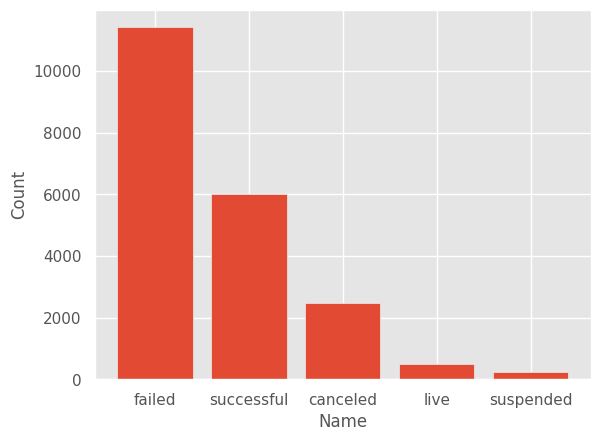

In [35]:
value_counts = kickstarter_Multiple['state'].value_counts()

# Create a bar plot of the unique values and their count
plt.bar(value_counts.index, value_counts.values)

# Add labels to the plot
plt.xlabel('Name')
plt.ylabel('Count')

**Encoding**

In [36]:
#converts type bool to 0 for false and 1 for true
kickstarter_Multiple['disable_communication'] = kickstarter_Multiple['disable_communication'] * 1 

#converts type bool to 0 for false and 1 for true
kickstarter_Multiple['staff_pick'] = kickstarter_Multiple['staff_pick'] * 1 

In [37]:
category = {'successful': 1, 'cancelled': 0, 'failed': 2, 'live':3,'suspended':4}
kickstarter_Multiple['state'] = kickstarter_Multiple['state'].map(category)

In [38]:
kickstarter_Multiple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    20632 non-null  float64
 1   pledged                 20632 non-null  float64
 2   state                   18172 non-null  float64
 3   disable_communication   20632 non-null  int64  
 4   country                 20632 non-null  object 
 5   currency                20632 non-null  object 
 6   staff_pick              20632 non-null  int64  
 7   backers_count           20632 non-null  int64  
 8   static_usd_rate         20632 non-null  float64
 9   usd_pledged             20632 non-null  float64
 10  category                18743 non-null  object 
 11  deadline_month          20632 non-null  int64  
 12  deadline_yr             20632 non-null  int64  
 13  state_changed_at_month  20632 non-null  int64  
 14  state_changed_at_yr     20632 non-null

In [39]:
print(kickstarter_Multiple['category'].unique())
print(kickstarter_Multiple['country'].unique())
print(kickstarter_Multiple['currency'].unique())

['Academic' 'Places' nan 'Blues' 'Restaurants' 'Webseries' 'Thrillers'
 'Shorts' 'Web' 'Apps' 'Gadgets' 'Hardware' 'Festivals' 'Plays' 'Musical'
 'Flight' 'Spaces' 'Immersive' 'Experimental' 'Comedy' 'Wearables' 'Sound'
 'Software' 'Robots' 'Makerspaces']
['US' 'DE' 'GB' 'CA' 'AU' 'AT' 'CH' 'NZ' 'IT' 'NL' 'SE' 'FR' 'MX' 'ES'
 'DK' 'IE' 'NO' 'BE' 'LU' 'SG' 'HK']
['USD' 'EUR' 'GBP' 'CAD' 'AUD' 'CHF' 'NZD' 'SEK' 'MXN' 'DKK' 'NOK' 'SGD'
 'HKD']


In [40]:
# perform categorical encoding for the 'color' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
kickstarter_clean = kickstarter_Multiple.copy()
kickstarter_clean['category'] = le.fit_transform(kickstarter_clean['category'])
kickstarter_clean['country'] = le.fit_transform(kickstarter_clean['country'])
kickstarter_clean['currency'] = le.fit_transform(kickstarter_clean['currency'])


In [41]:
kickstarter_clean = kickstarter_clean.dropna()

In [42]:
kickstarter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18172 entries, 0 to 20631
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    18172 non-null  float64
 1   pledged                 18172 non-null  float64
 2   state                   18172 non-null  float64
 3   disable_communication   18172 non-null  int64  
 4   country                 18172 non-null  int64  
 5   currency                18172 non-null  int64  
 6   staff_pick              18172 non-null  int64  
 7   backers_count           18172 non-null  int64  
 8   static_usd_rate         18172 non-null  float64
 9   usd_pledged             18172 non-null  float64
 10  category                18172 non-null  int64  
 11  deadline_month          18172 non-null  int64  
 12  deadline_yr             18172 non-null  int64  
 13  state_changed_at_month  18172 non-null  int64  
 14  state_changed_at_yr     18172 non-null

# **Feature Extraction using RFE for Multiple Classification**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

val_x = kickstarter_clean.loc[:, ~kickstarter_clean.columns.isin(['state'])]
val_y = kickstarter_clean['state']


In [44]:
val_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18172 entries, 0 to 20631
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    18172 non-null  float64
 1   pledged                 18172 non-null  float64
 2   disable_communication   18172 non-null  int64  
 3   country                 18172 non-null  int64  
 4   currency                18172 non-null  int64  
 5   staff_pick              18172 non-null  int64  
 6   backers_count           18172 non-null  int64  
 7   static_usd_rate         18172 non-null  float64
 8   usd_pledged             18172 non-null  float64
 9   category                18172 non-null  int64  
 10  deadline_month          18172 non-null  int64  
 11  deadline_yr             18172 non-null  int64  
 12  state_changed_at_month  18172 non-null  int64  
 13  state_changed_at_yr     18172 non-null  int64  
 14  created_at_month        18172 non-null

In [45]:
val_y.info()

<class 'pandas.core.series.Series'>
Int64Index: 18172 entries, 0 to 20631
Series name: state
Non-Null Count  Dtype  
--------------  -----  
18172 non-null  float64
dtypes: float64(1)
memory usage: 283.9 KB


In [46]:
val_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18172 entries, 0 to 20631
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    18172 non-null  float64
 1   pledged                 18172 non-null  float64
 2   disable_communication   18172 non-null  int64  
 3   country                 18172 non-null  int64  
 4   currency                18172 non-null  int64  
 5   staff_pick              18172 non-null  int64  
 6   backers_count           18172 non-null  int64  
 7   static_usd_rate         18172 non-null  float64
 8   usd_pledged             18172 non-null  float64
 9   category                18172 non-null  int64  
 10  deadline_month          18172 non-null  int64  
 11  deadline_yr             18172 non-null  int64  
 12  state_changed_at_month  18172 non-null  int64  
 13  state_changed_at_yr     18172 non-null  int64  
 14  created_at_month        18172 non-null

In [47]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(val_x, val_y, test_size=0.3, random_state=42)

for i in range(1,len(X_train.columns)+1):


  # Create a decision tree classifier
  dt = DecisionTreeClassifier()

  # Create RFE selector with decision tree classifier
  selector = RFE(dt, n_features_to_select=i)
  #print(selector)

  # Fit the selector to the training data
  fit = selector.fit(val_x, val_y)

  score = selector.score(val_x, val_y)
  print("Model Score with selected features ", i, "is: ", score)


Model Score with selected features  1 is:  0.8026084085406119
Model Score with selected features  2 is:  0.9740810037420207
Model Score with selected features  3 is:  0.9878934624697336
Model Score with selected features  4 is:  0.9957076821483601
Model Score with selected features  5 is:  0.9964780981730135
Model Score with selected features  6 is:  0.9990644948272067
Model Score with selected features  7 is:  0.99950473255558
Model Score with selected features  8 is:  0.9999449702839533
Model Score with selected features  9 is:  1.0
Model Score with selected features  10 is:  1.0
Model Score with selected features  11 is:  1.0
Model Score with selected features  12 is:  1.0
Model Score with selected features  13 is:  1.0
Model Score with selected features  14 is:  1.0
Model Score with selected features  15 is:  1.0
Model Score with selected features  16 is:  1.0
Model Score with selected features  17 is:  1.0
Model Score with selected features  18 is:  1.0


In [48]:

dt = DecisionTreeClassifier()

selector = RFE(dt, n_features_to_select=4)
fit = selector.fit(val_x, val_y)

score = selector.score(val_x, val_y)
print("Model Score with selected features ", 4, "is: ", score)

Model Score with selected features  4 is:  0.9957076821483601


In [49]:
selected_features = val_x.columns[fit.support_]
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Selected Features names:", selected_features)
print("Feature Ranking:", fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False False  True False False False False False
 False False False False False  True]
Selected Features names: Index(['goal', 'pledged', 'backers_count', 'launched_at_yr'], dtype='object')
Feature Ranking: [ 1  1  3 15 12 13  1  7  2 10  4  9  5 11  8 14  6  1]


In [50]:
kickstarter_clean.isnull().any().sum()

0

In [51]:

X_new = kickstarter_clean[['goal', 'pledged', 'backers_count','launched_at_yr']]
y_new = kickstarter_clean['state']


In [52]:
X_new.columns

Index(['goal', 'pledged', 'backers_count', 'launched_at_yr'], dtype='object')

In [54]:
y_new

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
20627    2.0
20628    2.0
20629    2.0
20630    2.0
20631    2.0
Name: state, Length: 18172, dtype: float64

In [55]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=16)


# **Machine Learning Models**

# **1. Logistic Regression**


In [56]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [57]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1687,  139,    0,    0],
       [   5, 3388,   21,    0],
       [  16,  131,    0,    0],
       [  14,   51,    0,    0]])

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95      1826
         2.0       0.91      0.99      0.95      3414
         3.0       0.00      0.00      0.00       147
         4.0       0.00      0.00      0.00        65

    accuracy                           0.93      5452
   macro avg       0.47      0.48      0.48      5452
weighted avg       0.90      0.93      0.91      5452



In [59]:
accuracy_log = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_log)

Accuracy: 0.9308510638297872


# **2. Decision Tree with depth 3**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import DecisionTreeClassifier
dtc_3 = DecisionTreeClassifier(max_depth = 3)
dtc_3.fit(X_train, y_train)
y_pred = dtc_3.predict(X_test)


In [80]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.81      0.91      0.86      1826
         2.0       0.93      0.90      0.91      3414
         3.0       0.84      0.69      0.76       147
         4.0       0.00      0.00      0.00        65

    accuracy                           0.88      5452
   macro avg       0.65      0.62      0.63      5452
weighted avg       0.88      0.88      0.88      5452



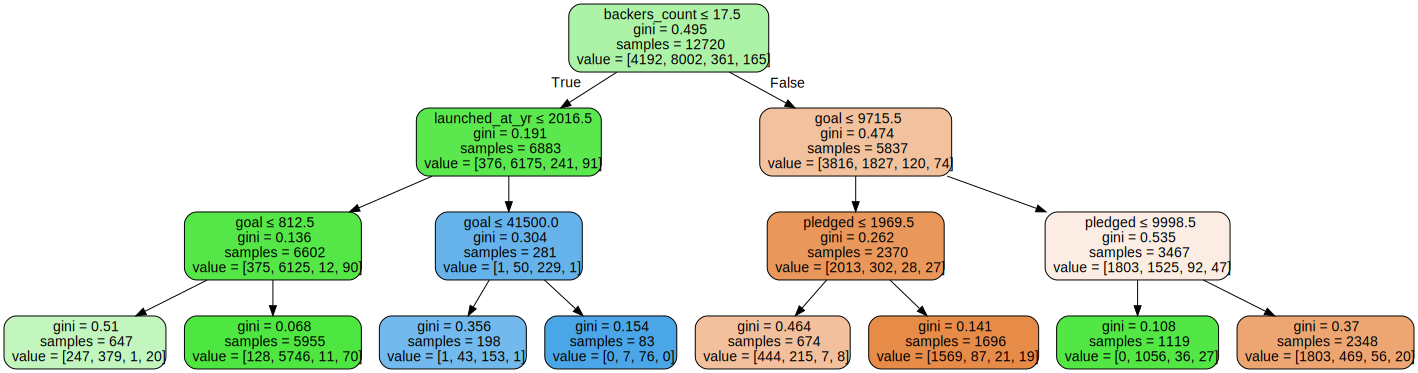

In [81]:
import graphviz
# Create the Graphviz representation of the decision tree
dot_data = export_graphviz(dtc_3, out_file=None, 
                           feature_names=X_new.columns.values, 
                           filled=True, rounded=True,  
                           special_characters=True) 

# Render the Graphviz representation as a PNG image
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree')

# Display the decision tree in Jupyter Notebook
graph

In [82]:
accuracy_dtc = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_dtc)

Accuracy: 0.884446074834923


## **3. KNN**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# train the classifier on the training set
knn.fit(X_train, y_train)

# make predictions on the testing set
y_pred = knn.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      1826
         2.0       0.95      1.00      0.97      3414
         3.0       0.90      0.06      0.11       147
         4.0       0.00      0.00      0.00        65

    accuracy                           0.96      5452
   macro avg       0.71      0.51      0.52      5452
weighted avg       0.95      0.96      0.94      5452



In [66]:
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_knn)

Accuracy: 0.9607483492296405


# **4. Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)



In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99      1826
         2.0       0.98      0.99      0.98      3414
         3.0       0.83      0.88      0.85       147
         4.0       0.00      0.00      0.00        65

    accuracy                           0.97      5452
   macro avg       0.70      0.71      0.71      5452
weighted avg       0.96      0.97      0.97      5452



In [69]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1816,    2,    8,    0],
       [  22, 3370,   18,    4],
       [   4,   14,  129,    0],
       [  15,   50,    0,    0]])

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99      1826
         2.0       0.98      0.99      0.98      3414
         3.0       0.83      0.88      0.85       147
         4.0       0.00      0.00      0.00        65

    accuracy                           0.97      5452
   macro avg       0.70      0.71      0.71      5452
weighted avg       0.96      0.97      0.97      5452



In [71]:
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9748716067498165


# **5. SVM**

In [72]:
from sklearn.svm import SVC
# Initialize the SVM model
svc = SVC(kernel='rbf')

# Train the SVM model
svc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svc.predict(X_test)


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.32      0.47      1826
         2.0       0.70      0.99      0.82      3414
         3.0       0.00      0.00      0.00       147
         4.0       0.00      0.00      0.00        65

    accuracy                           0.73      5452
   macro avg       0.41      0.33      0.32      5452
weighted avg       0.75      0.73      0.67      5452



In [74]:
accuracy_svc = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_svc)

Accuracy: 0.727072633895818


# **Accuracies before Cross validation**

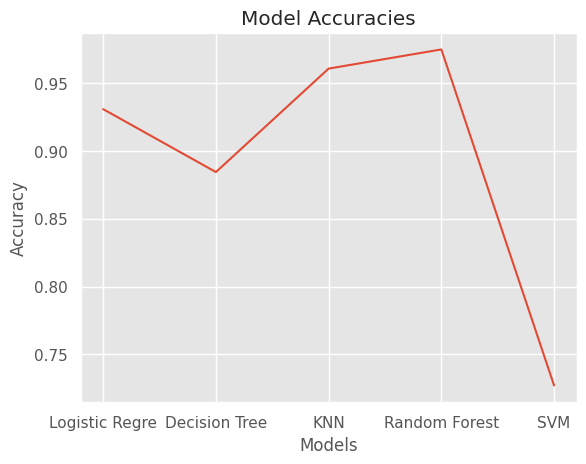

In [77]:
accuracy = [accuracy_log, accuracy_dtc, accuracy_knn, accuracy_rf, accuracy_svc]
labels = ["Logistic Regre", "Decision Tree","KNN", "Random Forest", "SVM"]
plt.plot(labels, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# for i, v in enumerate(accuracy):
#     plt.text(i, v+0.01, str(v), ha='center')

plt.show()

# **Using Cross Validation**

Random Forest Accuracy: 0.97 (+/- 0.00)
Logistic Accuracy: 0.91 (+/- 0.05)
K-Nearest Neighbors Accuracy: 0.96 (+/- 0.00)
Decision Tree Accuracy: 0.86 (+/- 0.03)
SVM Accuracy: 0.72 (+/- 0.05)


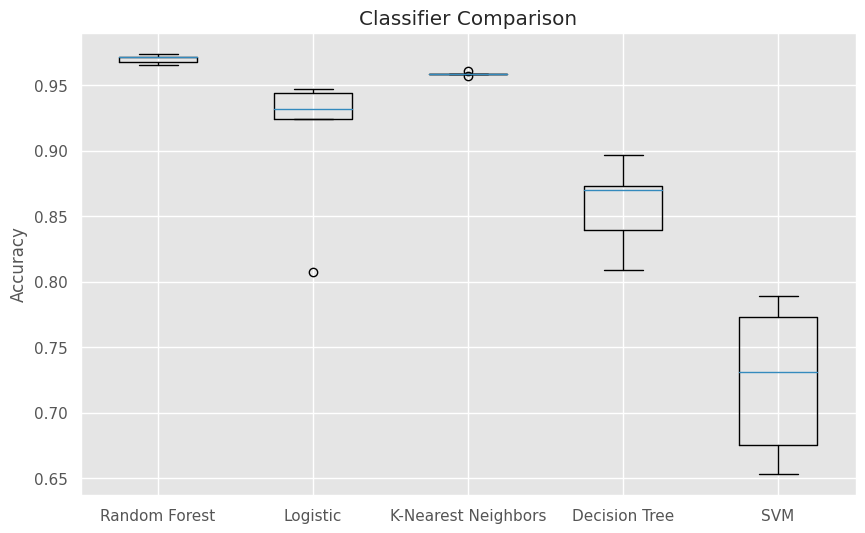

In [76]:
# create a dictionary of classifiers
from sklearn.model_selection import cross_val_score

classifiers = {'Random Forest': RandomForestClassifier(n_estimators=100),
               'Logistic': LogisticRegression(random_state=16),
               'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
               'Decision Tree': DecisionTreeClassifier(max_depth = 3),
              'SVM' : SVC(kernel = 'rbf')}

# perform cross-validation on each classifier
scores = {}
for clf_name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_new, y_new, cv=5)
    scores[clf_name] = cv_scores
    print(f"{clf_name} Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

# plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(scores.values())
ax.set_xticklabels(scores.keys())
ax.set_title('Classifier Comparison')
ax.set_ylabel('Accuracy')
plt.show()